In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
%matplotlib inline  

# Fetch dataset
df = pd.read_csv('https://s3-us-west-2.amazonaws.com/patchworks-coding-challenge/amazon_alexa.tsv', sep='\t')


In [29]:
import nltk
from nltk.corpus import stopwords

In [30]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [31]:
df.shape

(3150, 5)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


In [33]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [34]:
df['verified_reviews'] = df['verified_reviews'].apply(lambda x: x.lower())
df['verified_reviews'] = df['verified_reviews'].apply(lambda x: x.translate(None, string.punctuation))
df['verified_reviews'] = df['verified_reviews'].apply(lambda x: x.translate(None, string.digits))
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love my echo,1
1,5,31-Jul-18,Charcoal Fabric,loved it,1
2,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer ...,1
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my yr...,1
4,5,31-Jul-18,Charcoal Fabric,music,1
5,5,31-Jul-18,Heather Gray Fabric,i received the echo as a gift i needed another...,1
6,3,31-Jul-18,Sandstone Fabric,without having a cellphone i cannot use many o...,1
7,5,31-Jul-18,Charcoal Fabric,i think this is the th one ive purchased im wo...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,love it i’ve listened to songs i haven’t heard...,1


In [35]:
df.replace(' ', np.nan, inplace=True)
df = df.dropna()
#df.loc[df['verified_reviews'] == 'loved it']


In [36]:
df = df[df.verified_reviews != 'love it']

In [37]:
df = df[df.verified_reviews != 'loved it']

In [38]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love my echo,1
2,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer ...,1
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my yr...,1
4,5,31-Jul-18,Charcoal Fabric,music,1
5,5,31-Jul-18,Heather Gray Fabric,i received the echo as a gift i needed another...,1
6,3,31-Jul-18,Sandstone Fabric,without having a cellphone i cannot use many o...,1
7,5,31-Jul-18,Charcoal Fabric,i think this is the th one ive purchased im wo...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,love it i’ve listened to songs i haven’t heard...,1
10,5,30-Jul-18,Charcoal Fabric,i sent it to my year old dad and he talks to ...,1


In [39]:
df = df[df['verified_reviews'].str.split().str.len() != 1]


In [40]:
#df.groupby('date').nunique()
#df['date'] =  pd.to_datetime(df['date'])
#df.sort_values(by='date')

df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love my echo,1
2,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer ...,1
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my yr...,1
5,5,31-Jul-18,Heather Gray Fabric,i received the echo as a gift i needed another...,1
6,3,31-Jul-18,Sandstone Fabric,without having a cellphone i cannot use many o...,1
7,5,31-Jul-18,Charcoal Fabric,i think this is the th one ive purchased im wo...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,love it i’ve listened to songs i haven’t heard...,1
10,5,30-Jul-18,Charcoal Fabric,i sent it to my year old dad and he talks to ...,1
11,5,30-Jul-18,Charcoal Fabric,i love it learning knew things with it eveyday...,1


In [41]:
#a = df.groupby('date').nunique()
#a

In [42]:
#df.date = datetime.strptime(x,'%d-%b-%y') for x in df.date
#from datetime import datetime

#df = df[df['date'].strptime(x,'%d-%b-%y')]


In [43]:
#df['date'] = df['date'].dt.strftime('%m-%b-%y')

df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.date


/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [44]:
df.sort_values(by='date')


,rating,date,variation,verified_reviews,feedback
699,5,2018-05-16,White,it works just as well as the new version i got...,1
698,5,2018-05-16,Black,like new,1
697,5,2018-05-16,Black,perfect condition,1
696,5,2018-05-16,Black,i have no complaints as far as i know these ar...,1
695,5,2018-05-16,Black,like new no difference from new unused original,1
689,5,2018-05-17,Black,echo is good,1
694,5,2018-05-17,Black,great product wakes me up every morning on time,1
693,5,2018-05-17,White,works perfect there’s no difference at all bet...,1
692,5,2018-05-17,Black,amazingly fun my daughter and i just asked que...,1
691,5,2018-05-17,Black,great price to extend the range and super valu...,1


In [45]:
a = df.groupby('date').nunique()
a

,rating,date,variation,verified_reviews,feedback
date,,,,,
2018-05-16,1,1,2,5,1
2018-05-17,1,1,2,7,1
2018-05-18,2,1,1,3,1
2018-05-19,3,1,2,5,1
2018-05-20,2,1,2,5,1
2018-05-21,1,1,2,2,1
2018-05-22,2,1,1,3,2
2018-05-23,3,1,2,5,2
2018-05-24,3,1,2,5,2


In [46]:
# Just making the plots look better
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (28,36)
plt.rcParams['font.size'] = 12

In [47]:
a = a.drop(columns=['rating','feedback','date',
               'variation'])
#a.fillna('verified_reviews')

In [48]:
a

,verified_reviews
date,
2018-05-16,5
2018-05-17,7
2018-05-18,3
2018-05-19,5
2018-05-20,5
2018-05-21,2
2018-05-22,3
2018-05-23,5
2018-05-24,5


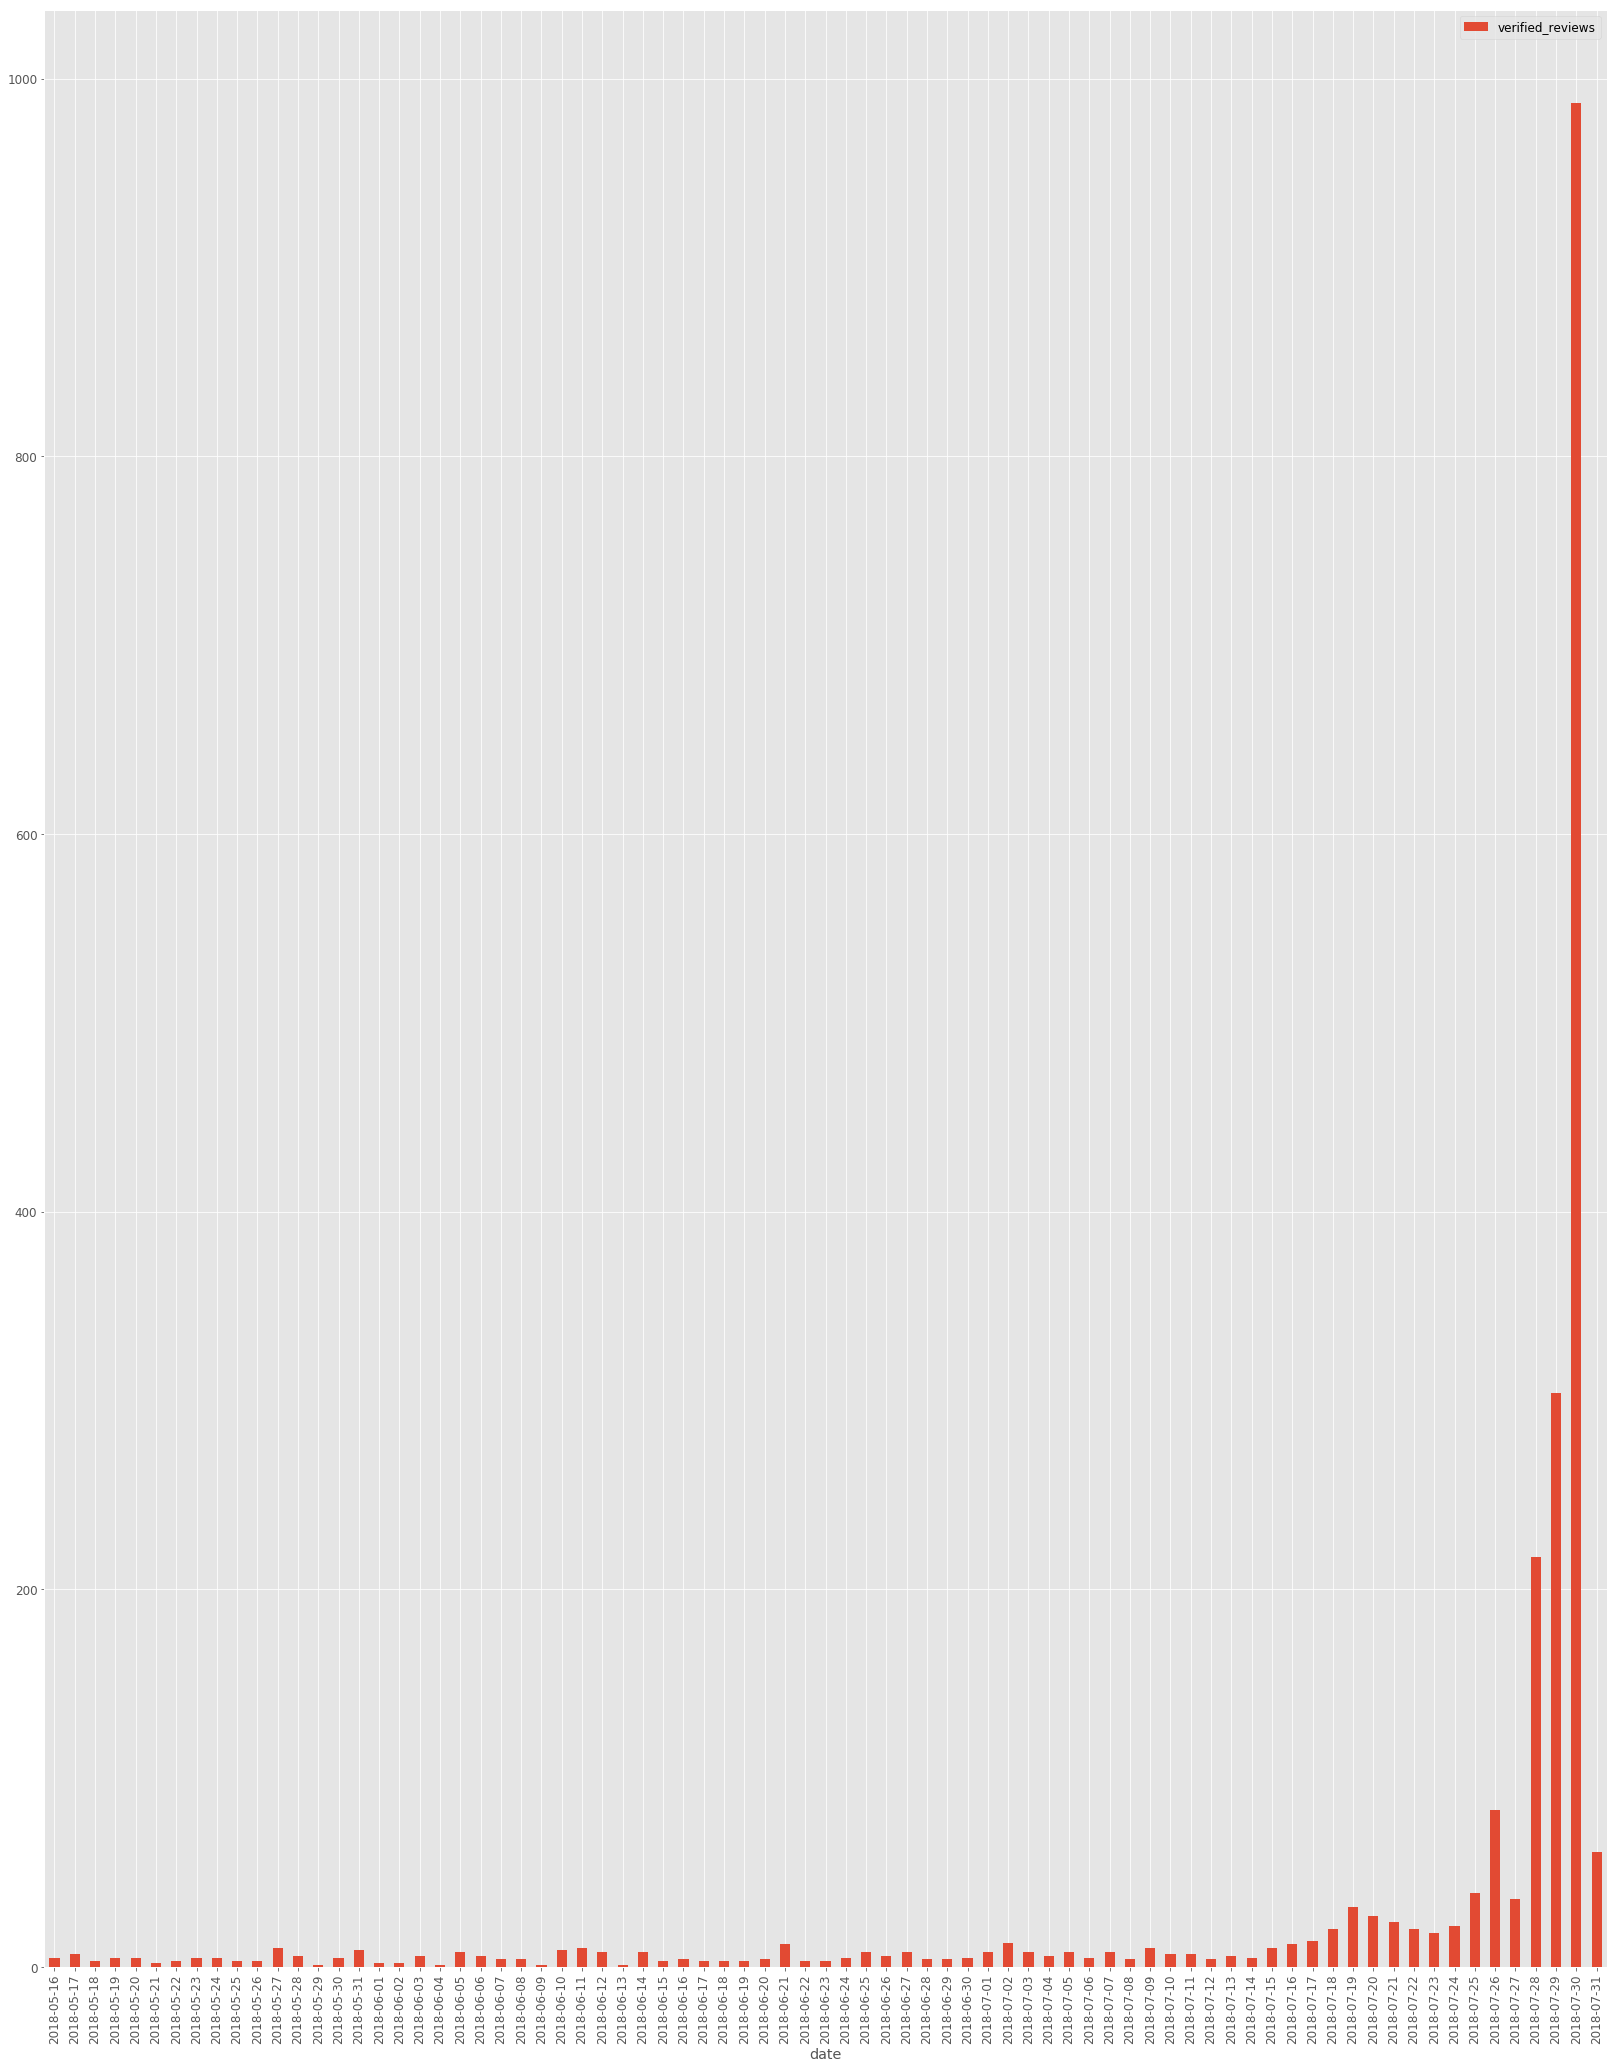

In [49]:
a.plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23e3bb90>]], dtype=object)

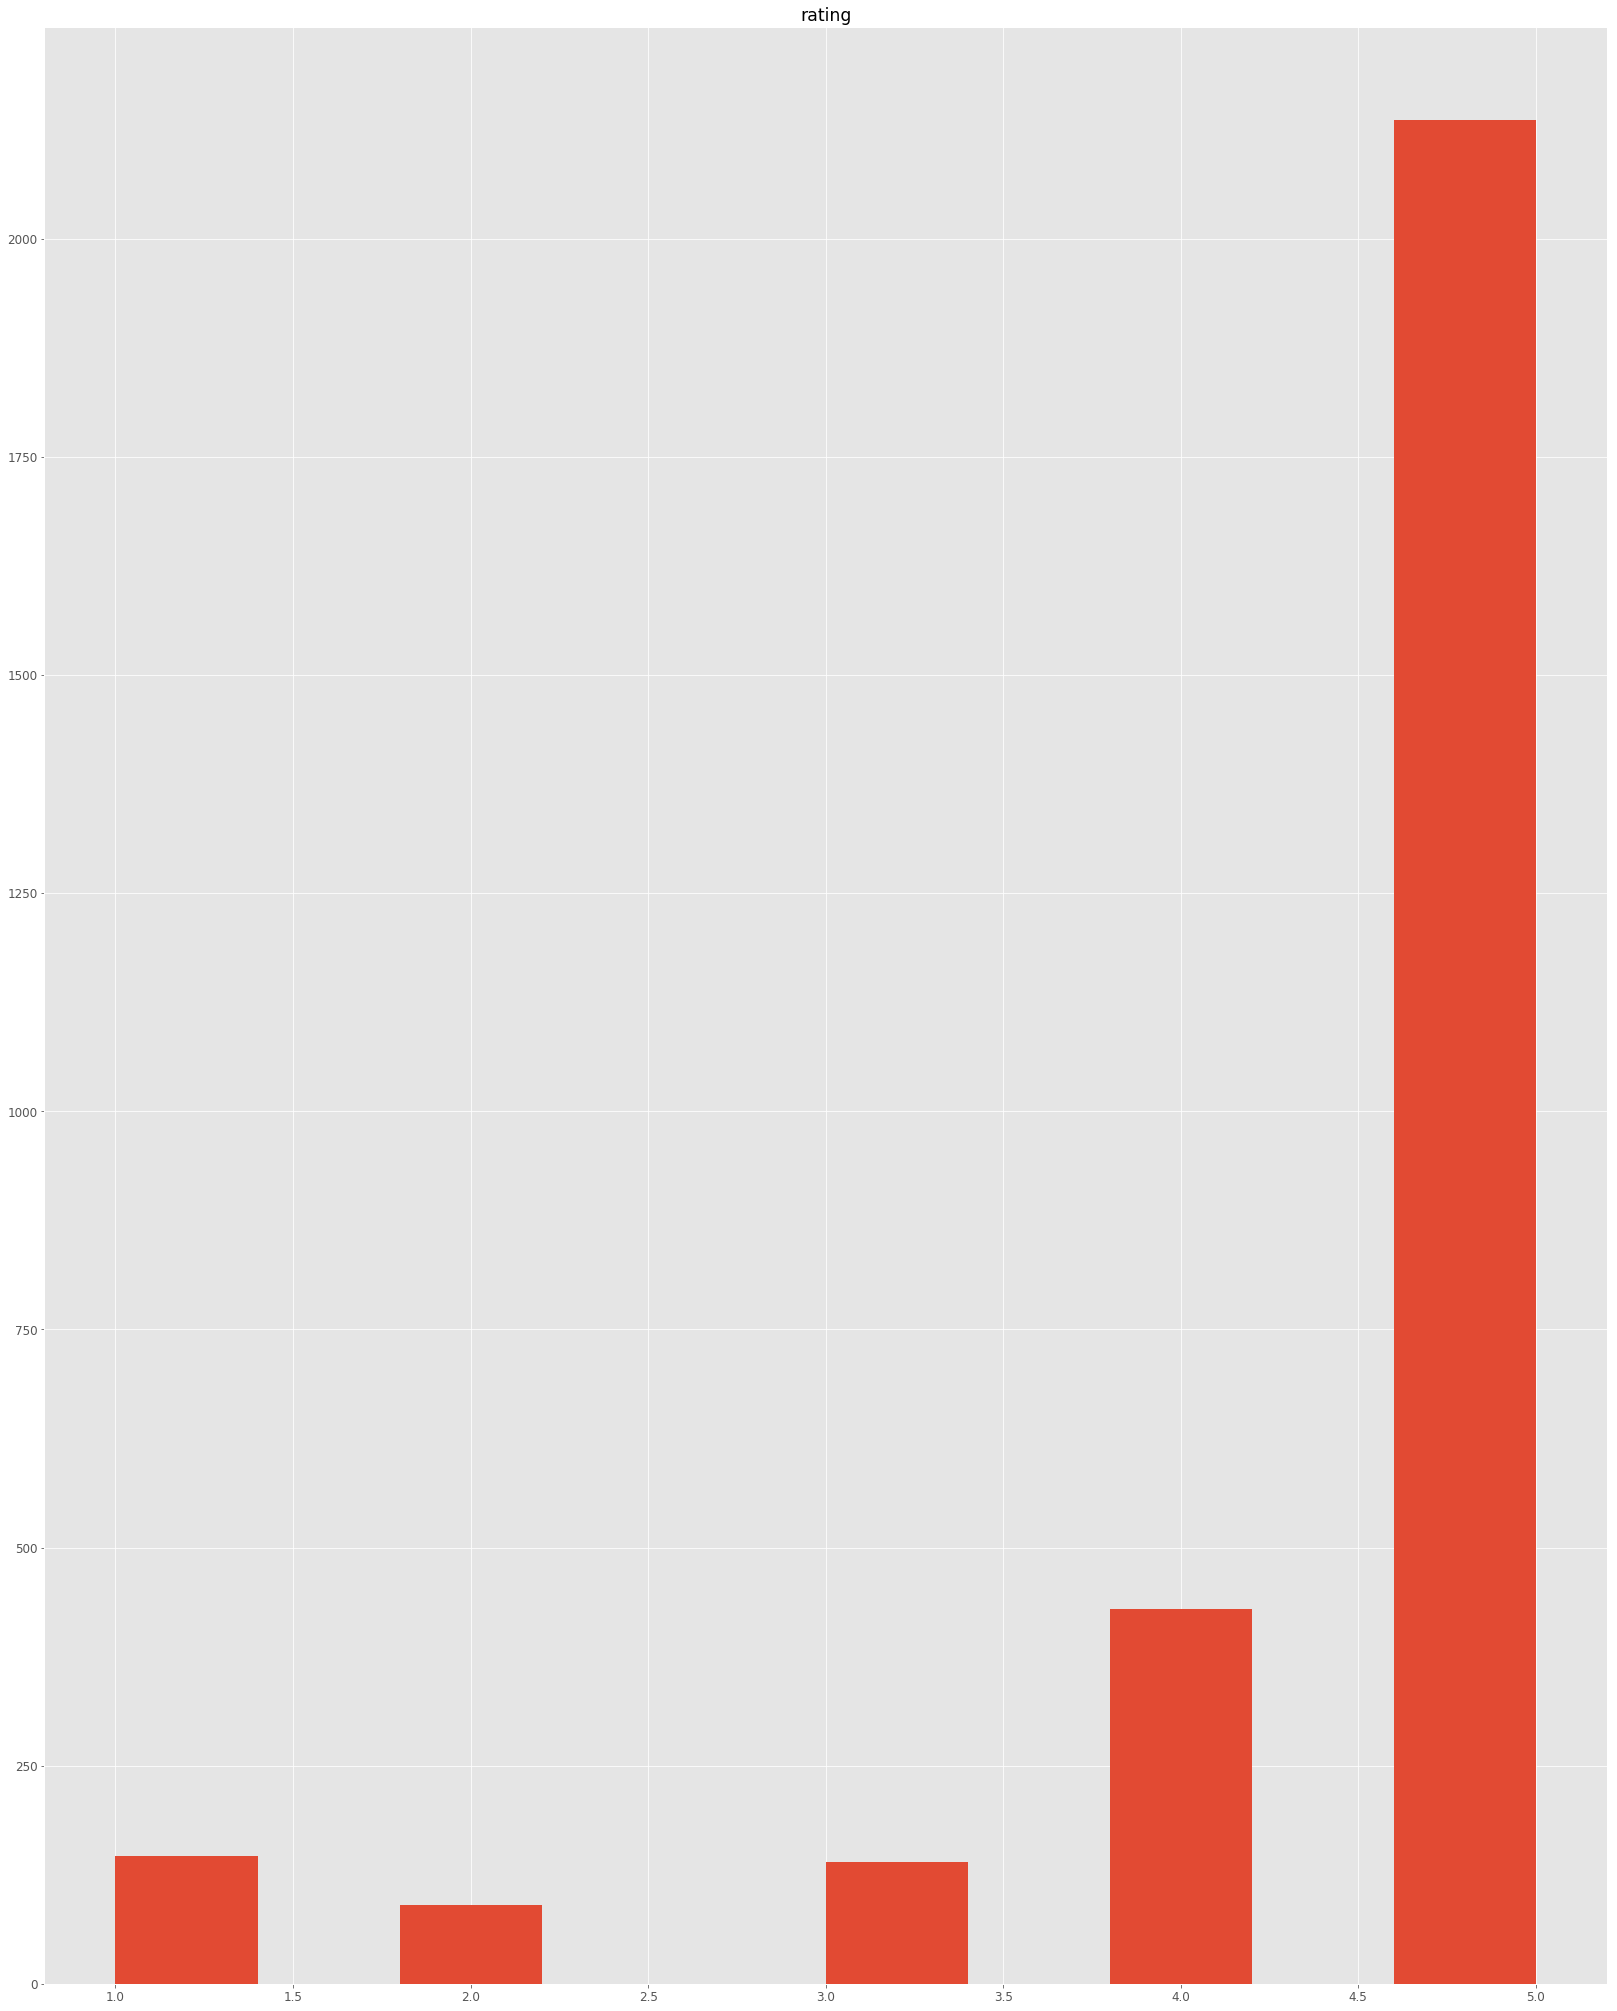

In [50]:
df.hist(column='rating')


In [51]:
#Remove nonenglish and Remove filler words

In [52]:
#from nltk.corpus import stopwords
#nltk.download()
#stop = stopwords.words('english')


In [53]:
#df['verified_reviews_clean'] = df['verified_reviews'].apply(lambda x: [item for item in x if item not in stop])


<WordListCorpusReader in u'.../corpora/stopwords' (not loaded yet)>
